In [1]:
%matplotlib widget
from circuit import *
from models import NPN, PNP, Diode, Resistor, VoltageSource, CurrentSource, OpAmp

In [21]:
circuit = Circuit()

var = Symbol("Vin", real=True)

Vcc, Gnd, Vee = 5, 0, -5

V0, V1, V2, V3, V4 = circuit.addNodes(5)

circuit.addElements(
                        Resistor("R4", (Vcc, V2), 1e-12),

                        NPN("Q1", (V2, V1, V3)),

                        VoltageSource("G1", (V0, Gnd), var),

                        OpAmp("OpAmp1", (V0, V3, V1, Vcc, Vee)),

                        Resistor("R3", (V3, Gnd), 10e3),

                        PNP("Q2", (V3, V1, V4)),

                        Resistor("R2", (V4, Vee), 1e-12),
                    )

Vout = circuit.voltageOnElement("R3")
Ib1 = circuit.currentThroughElement("Q1", 1)
Ib2 = circuit.currentThroughElement("Q2", 1)

circuitModel = circuit.solve(False)

In [22]:
printCircuitSolution(circuitModel, var)

-------------------------------------
Q1_Cut, OpAmp1_Amp, Q2_Fwd
Vin ∈ Interval(-4.30000000000000, 0)
{I_5: 0.0, I_6: 0.0, I_7: 0.0, V_0: Vin, V_1: Vin - 0.7, V_3: Vin, V_4: -9.9009900990099e-17*Vin - 5.0, I_3: 0.0, I_4: 0.0, I_8: 0.0, I_9: -9.9009900990099e-7*Vin, I_12: 0.0001*Vin, I_13: -0.0001*Vin, I_14: -0.0001*Vin, I_15: 9.9009900990099e-7*Vin, I_16: 9.9009900990099e-5*Vin, I_17: -9.9009900990099e-5*Vin, I_18: 9.9009900990099e-5*Vin, V_2: 5.00000000000000, I_0: 0.0, I_1: 0.0, I_2: 0.0, I_10: 0.0, I_11: 0.0}
-------------------------------------
-------------------------------------
Q1_Cut, OpAmp1_SatMin, Q2_Fwd
Vin ∈ Interval.open(-oo, -4.30000000000000)
{I_5: 0.0, I_6: 0.0, I_7: 0.0, V_1: -5.00000000000000, V_3: -4.30000000000000, V_4: -5.00000000000000, I_3: 0.0, I_4: 0.0, I_8: 0.0, I_9: 4.25742574257426e-6, I_12: -0.000430000000000000, I_13: 0.000430000000000000, I_14: 0.000430000000000000, I_15: -4.25742574257426e-6, I_16: -0.000425742574257426, I_17: 0.000425742574257426, I_1

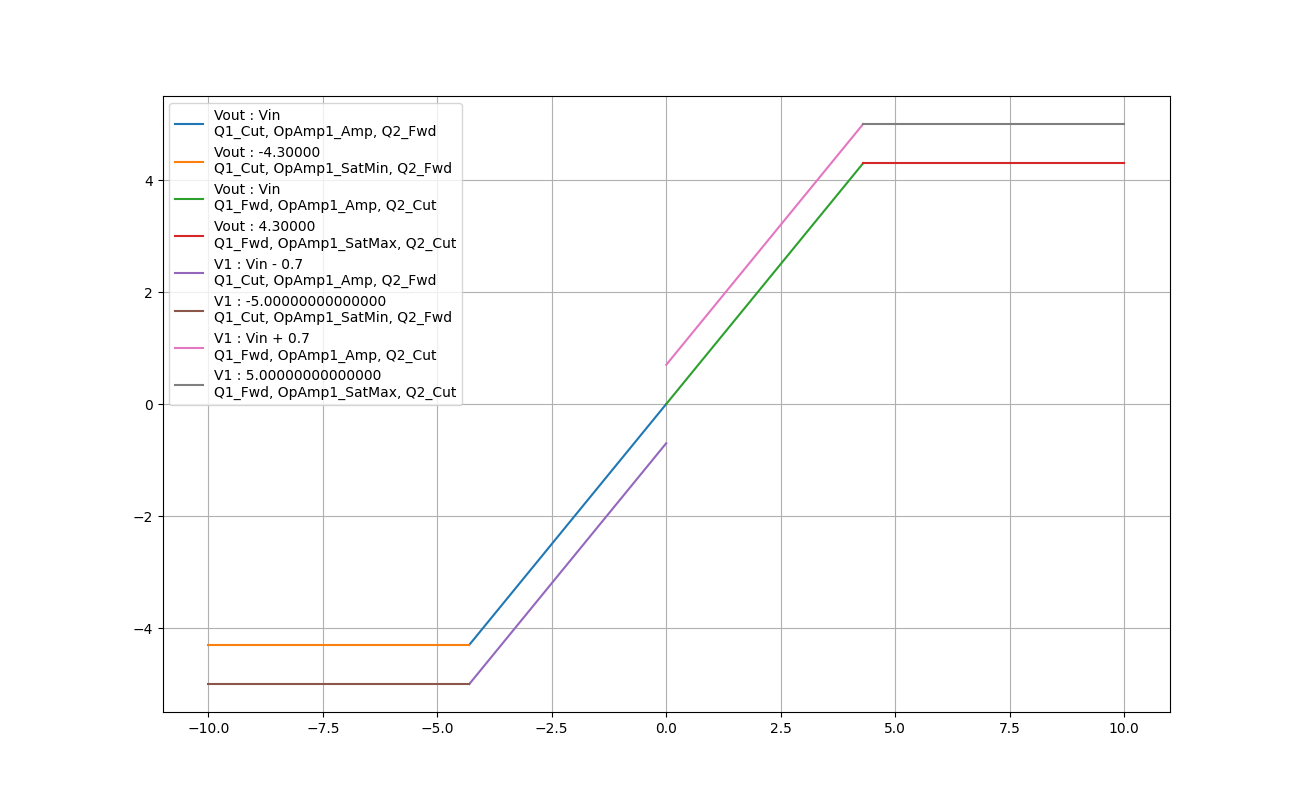

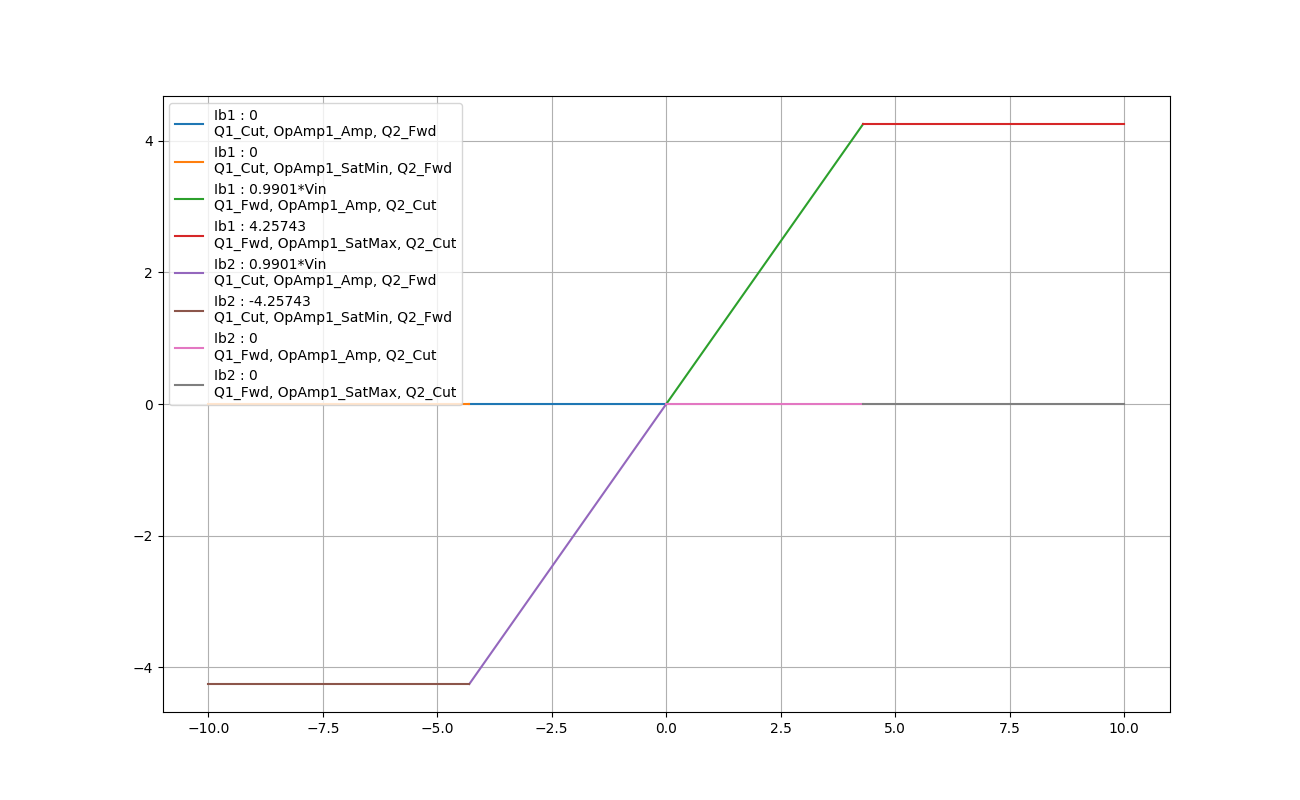

In [23]:
from sympy import diff


measurments =   [   
                    (lambda sol : Vout.subs(sol), "Vout"),
                    (lambda sol : V1().subs(sol), "V1"),
                ]

fig, ax = plt.subplots(figsize=[13, 8])
plotMeasurments(circuitModel, -10, 10, 0.1, measurments, var)
plt.legend(loc="best");
plt.grid(True);

measurments =   [   
                    (lambda sol : 1e6 * Ib1.subs(sol), "Ib1"),
                    (lambda sol : 1e6 * Ib2.subs(sol), "Ib2"),
                ]
        
fig, ax = plt.subplots(figsize=[13, 8])
plotMeasurments(circuitModel, -10, 10, 0.1, measurments, var)
plt.legend(loc="best");
plt.grid(True);